In [38]:
import keras
import numpy as np
import pandas as pd 
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [39]:
x_uni = np.load("data_error/input_windows_uni.npy")
x_uni_r = np.load("data_error/input_windows_uni_r.npy")
x_multi = np.load("data_error/input_windows_multi.npy")
x_multi_r = np.load("data_error/input_windows_multi_r.npy")

y = np.load("data_error/output_windows_uni.npy")
y_r = np.load("data_error/output_windows_uni_r.npy")

In [40]:
print(x_uni.shape)
print(x_uni_r.shape)

(76102, 10)
(12655, 10)


In [42]:
# create test and train
x_train_uni = x_uni[:60881]
x_test_uni = x_uni[60881:]
y_train = y[:60881]
y_test = y[60881:]
print(x_train_uni.shape)
print(x_test_uni.shape)
print(y_train.shape)
print(y_test.shape)

(60881, 10)
(15221, 10)
(60881, 10)
(15221, 10)


In [43]:
x_train_uni_r = x_uni_r[:10124]
x_test_uni_r = x_uni_r[10124:]
y_train_r = y_r[:10124]
y_test_r = y_r[10124:]
print(x_train_uni_r.shape)
print(x_test_uni_r.shape)
print(y_train_r.shape)
print(y_test_r.shape)

(10124, 10)
(2531, 10)
(10124, 10)
(2531, 10)


In [44]:
x_train_multi = x_multi[:60881]
x_test_multi = x_multi[60881:]
print(x_train_multi.shape)
print(x_test_multi.shape)

(60881, 10, 8)
(15221, 10, 8)


In [45]:
x_train_multi_r = x_multi_r[:10124]
x_test_multi_r = x_multi_r[10124:]
print(x_train_multi_r.shape)
print(x_test_multi_r.shape)

(10124, 10, 8)
(2531, 10, 8)


In [46]:
# reshape the univariate data to 3 dimensional
x_train_uni = np.reshape(x_train_uni, (x_train_uni.shape[0], x_train_uni.shape[1], 1))
x_test_uni = np.reshape(x_test_uni, (x_test_uni.shape[0], x_test_uni.shape[1], 1))
print(x_train_uni.shape)
print(x_test_uni.shape)

x_train_uni_r = np.reshape(x_train_uni_r, (x_train_uni_r.shape[0], x_train_uni_r.shape[1], 1))
x_test_uni_r = np.reshape(x_test_uni_r, (x_test_uni_r.shape[0], x_test_uni_r.shape[1], 1))
print(x_train_uni_r.shape)
print(x_test_uni_r.shape)

y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))
y_train= np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(y_test.shape)
print(y_train.shape)

y_test_r = np.reshape(y_test_r, (y_test_r.shape[0], y_test_r.shape[1], 1))
y_train_r= np.reshape(y_train_r, (y_train_r.shape[0], y_train_r.shape[1], 1))
print(y_test_r.shape)
print(y_train_r.shape)

(60881, 10, 1)
(15221, 10, 1)
(10124, 10, 1)
(2531, 10, 1)
(15221, 10, 1)
(60881, 10, 1)
(2531, 10, 1)
(10124, 10, 1)


In [47]:
# set type multi windows to float
x_train_multi = x_train_multi.astype(float)
x_test_multi = x_test_multi.astype(float)
x_train_multi_r = x_train_multi_r.astype(float)
x_test_multi_r = x_test_multi_r.astype(float)

# LSTM-FCN

LSTM-FCN - NO rain

In [44]:
from keras import backend as K
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, Flatten, Reshape
from keras.layers import Input, Dense, LSTM, concatenate, Activation, GRU, SimpleRNN
from keras.models import Model
from keras.optimizers import Adam

In [14]:
# reshape training and test data
x_train_uni = x_train_uni.reshape(-1, 1, 10)
y_train = y_train.reshape(-1, 1, 10)

x_test_uni = x_test_uni.reshape(-1, 1, 10)
y_test = y_test.reshape(-1, 1, 10)

In [15]:
ip = Input(shape=(1, 10))

x = LSTM(64, activation="relu", return_sequences=True)(ip)
x = Dropout(0.2)(x)

y = Permute((2, 1))(ip)
y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = GlobalAveragePooling1D()(y)
y = Reshape((1, 128))(y)  # Reshape y to have the same shape as x along the concatenation axis

x = concatenate([x, y])

out = Dense(10, activation='linear')(x) #Hier heb ik wellicht per ongeluk iets verandert

model_LSTMFCN = Model(ip, out)

In [12]:
model_LSTMFCN.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 10, 1)     │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 10, 128)   │      1,152 │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 10, 128)   │        512 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 10, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 10, 256)   │    164,096 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 256)   │      1,024 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 10, 256)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 10, 128)   │     98,432 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 128)   │        512 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 10, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 1, 64)     │     19,200 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_2[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1, 64)     │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 128)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1, 192)    │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 10)     │      1,930 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 286,858 (1.09 MB)

 Trainable params: 285,834 (1.09 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [17]:
optimizer = Adam(learning_rate=0.001)
model_LSTMFCN.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [18]:
history_LSTMFCN = model_LSTMFCN.fit(x_train_uni, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - loss: 8424680960.0000 - mae: 90569.2109 - mape: 99.6901 - mse: 8424680960.0000 - val_loss: 8363778560.0000 - val_mae: 90099.8906 - val_mape: 97.5439 - val_mse: 8363778560.0000
Epoch 2/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 7849340416.0000 - mae: 87383.5625 - mape: 96.0165 - mse: 7849340416.0000 - val_loss: 7222924800.0000 - val_mae: 83779.7031 - val_mape: 90.7617 - val_mse: 7222924800.0000
Epoch 3/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - loss: 6780552192.0000 - mae: 81128.7500 - mape: 89.0272 - mse: 6780552192.0000 - val_loss: 6030114816.0000 - val_mae: 76485.5000 - val_mape: 82.8755 - val_mse: 6030114816.0000
Epoch 4/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 5467727872.0000 - mae: 72609.8594 - mape: 79.5690 - mse: 5467727872.0000 - val_loss: 4497829888.0000 - val_mae: 65888.6172 - val_mape: 71.4749 - val_mse: 4497829888.0000
Epoch 5/20
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 

In [19]:
test_loss_LSTMFCN, test_mse_LSTMFCN, test_mae_LSTMFCN, test_mape_LSTMFCN = model_LSTMFCN.evaluate(x_test_uni, y_test)

print("Test Loss:", test_loss_LSTMFCN)
print("Test MSE:", test_loss_LSTMFCN)
print("Test MAE:", test_mae_LSTMFCN)
print("Test MAPE:", test_mape_LSTMFCN)

476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 60102172.0000 - mae: 3733.0591 - mape: 3.5657 - mse: 60102172.0000
Test Loss: 55024168.0
Test MSE: 55024168.0
Test MAE: 3479.548583984375
Test MAPE: 3.424360513687134


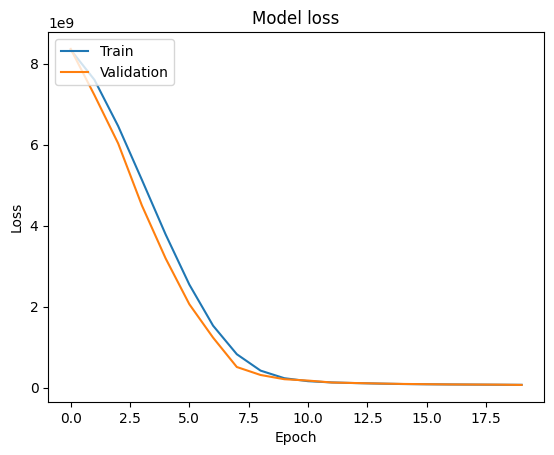

In [20]:
# Plot training & validation loss values
plt.plot(history_LSTMFCN.history['loss'])
plt.plot(history_LSTMFCN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
yhat_LSTMFCN = model_LSTMFCN.predict(x_test_uni, verbose=0)

In [22]:
# Reshape back to (-1, 10, 1)
x_test_uni = x_test_uni.reshape(15221, 10, 1)
y_test_uni = y_test.reshape(15221, 10, 1)
yhat_LSTMFCN = yhat_LSTMFCN.reshape(15221, 10, 1)

In [23]:
# save predictions
np.save("predicted_data_error/pred_LSTMFCN", yhat_LSTMFCN)

LSTM-FCN - RAIN

In [45]:
# reshape training and test data
x_train_uni_r = x_train_uni_r.reshape(-1, 1, 10)
y_train_r = y_train_r.reshape(-1, 1, 10)

x_test_uni_r = x_test_uni_r.reshape(-1, 1, 10)
y_test_r = y_test_r.reshape(-1, 1, 10)

In [46]:
ip = Input(shape=(1, 10))

x = LSTM(64, activation="relu", return_sequences=True)(ip)
x = Dropout(0.2)(x)

y = Permute((2, 1))(ip)
y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = GlobalAveragePooling1D()(y)
y = Reshape((1, 128))(y)  # Reshape y to have the same shape as x along the concatenation axis

x = concatenate([x, y])

out = Dense(10, activation='linear')(x) #Hier heb ik wellicht per ongeluk iets verandert

model_LSTMFCN_r = Model(ip, out)

In [47]:
model_LSTMFCN_r.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 1, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_4 (Permute) │ (None, 10, 1)     │          0 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 10, 128)   │      1,152 │ permute_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 128)   │        512 │ conv1d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 10, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 10, 256)   │    164,096 │ activation_12[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 256)   │      1,024 │ conv1d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 10, 256)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 10, 128)   │     98,432 │ activation_13[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 128)   │        512 │ conv1d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 10, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 1, 64)     │     19,200 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_14[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 1, 64)     │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 1, 128)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 1, 192)    │          0 │ dropout_4[0][0],  │
│ (Concatenate)       │                   │            │ reshape_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1, 10)     │      1,930 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 286,858 (1.09 MB)

 Trainable params: 285,834 (1.09 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [48]:
optimizer = Adam(learning_rate=0.001)
model_LSTMFCN_r.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [49]:
history_LSTMFCN_r = model_LSTMFCN_r.fit(x_train_uni_r, y_train_r, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 8202426368.0000 - mae: 89696.4297 - mape: 99.8861 - mse: 8202426368.0000 - val_loss: 8318423552.0000 - val_mae: 90368.9766 - val_mape: 99.0230 - val_mse: 8318423552.0000
Epoch 2/20
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 7990345216.0000 - mae: 88527.0078 - mape: 98.4648 - mse: 7990345216.0000 - val_loss: 7919460864.0000 - val_mae: 88198.4531 - val_mape: 96.6696 - val_mse: 7919460864.0000
Epoch 3/20
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 7492494336.0000 - mae: 85742.8984 - mape: 95.5971 - mse: 7492494336.0000 - val_loss: 7321227264.0000 - val_mae: 84838.3281 - val_mape: 93.0356 - val_mse: 7321227264.0000
Epoch 4/20
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 6883361280.0000 - mae: 82179.3906 - mape: 91.6913 - mse: 6883361280.0000 - val_loss: 6655554560.0000 - val_mae: 80920.3359 - val_mape: 88.8019 - val_mse: 6655554560.0000
Epoch 5/20
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 

In [50]:
test_loss_LSTMFCN_r, test_mse_LSTMFCN_r, test_mae_LSTMFCN_r, test_mape_LSTMFCN_r = model_LSTMFCN_r.evaluate(x_test_uni_r, y_test_r)

print("Test Loss:", test_loss_LSTMFCN_r)
print("Test MSE:", test_loss_LSTMFCN_r)
print("Test MAE:", test_mae_LSTMFCN_r)
print("Test MAPE:", test_mape_LSTMFCN_r)

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 76685688.0000 - mae: 5873.8730 - mape: 6.1829 - mse: 76685688.0000
Test Loss: 78678872.0
Test MSE: 78678872.0
Test MAE: 5657.99365234375
Test MAPE: 6.171401023864746


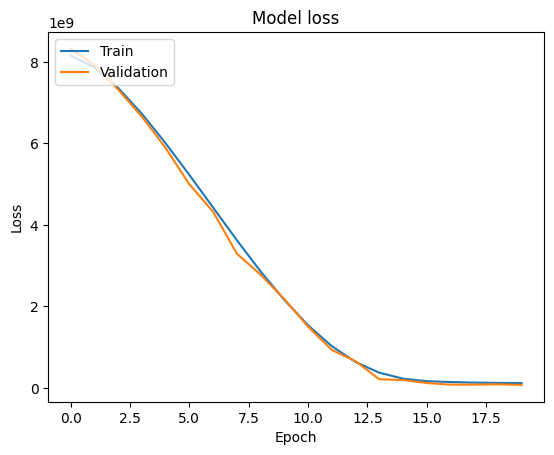

In [51]:
# Plot training & validation loss values
plt.plot(history_LSTMFCN_r.history['loss'])
plt.plot(history_LSTMFCN_r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
yhat_LSTMFCN_r = model_LSTMFCN_r.predict(x_test_uni_r, verbose=0)

In [53]:
# Reshape back to (-1, 10, 1)
x_test_uni_r = x_test_uni_r.reshape(2531, 10, 1)
y_test_r = y_test_r.reshape(2531, 10, 1)
yhat_LSTMFCN_r = yhat_LSTMFCN_r.reshape(2531, 10, 1)

In [54]:
# save predictions
np.save("predicted_data_error/pred_LSTMFCN_r", yhat_LSTMFCN_r)

# MLSTM-FCN

MLSTM-FCN - NO rain

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape, RepeatVector, TimeDistributed
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras import backend as K
from keras.optimizers import Adam

In [14]:
def squeeze_excite_block(inputt):
    ''' Create a squeeze-excite block
    Args:
        input: input tensor
        filters: number of output filters
        k: width factor

    Returns: a keras tensor
    '''
    filters = inputt.shape[-1] # channel_axis = -1 for TF

    se = GlobalAveragePooling1D()(inputt)
    se = Reshape((1, filters))(se)
    se = Dense(filters // 16,  activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    se = multiply([inputt, se])
    return se

In [47]:
# reshape training and test data
x_train_multi = x_train_multi.reshape(-1, 8, 10)
y_train = y_train.reshape(-1, 1, 10)

x_test_multi = x_test_multi.reshape(-1, 8, 10)
y_test = y_test.reshape(-1, 1, 10)

In [48]:
ip = Input(shape=(x_train_multi.shape[1], 10))

x = Masking()(ip)
x = LSTM(128, activation="relu", return_sequences=True)(x)
x = Dropout(0.2)(x)

y = Permute((2, 1))(ip)
y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
y = squeeze_excite_block(y)

y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
y = squeeze_excite_block(y)

y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = GlobalAveragePooling1D()(y)
y = RepeatVector(x.shape[1])(y)  # Repeat y to match the time dimension of x

x = concatenate([x, y])

out = Dense(10, activation='linear')(x)


model_MLSTMFCN = Model(ip, out)

In [49]:
model_MLSTMFCN.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_3 (Permute) │ (None, 10, 8)     │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 10, 128)   │      8,320 │ permute_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 128)   │        512 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 10, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_9[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 1, 128)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1, 8)      │      1,024 │ reshape_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 1, 128)    │      1,024 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_6          │ (None, 10, 128)   │          0 │ activation_9[0][… │
│ (Multiply)          │                   │            │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 10, 256)   │    164,096 │ multiply_6[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 256)   │      1,024 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 10, 256)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ activation_10[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, 1, 256)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1, 16)     │      4,096 │ reshape_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1, 256)    │      4,096 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_7          │ (None, 10, 256)   │          0 │ activation_10[0]… │
│ (Multiply)          │                   │            │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 10, 128)   │     98,432 │ multiply_7[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_3         │ (None, 8, 10)     │          0 │ input_layer_3[0]… │
│ (NotEqual)          │                   │            │                 

 Total params: 356,874 (1.36 MB)

 Trainable params: 355,850 (1.36 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [50]:
optimizer = Adam(learning_rate=0.001)
model_MLSTMFCN.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [51]:
history_MLSTMFCN = model_MLSTMFCN.fit(x_train_multi, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 155s 96ms/step - loss: 6268350464.0000 - mae: 71935.7266 - mape: 78.9694 - mse: 6268350464.0000 - val_loss: 3241464064.0000 - val_mae: 40567.7500 - val_mape: 43.6428 - val_mse: 3241464320.0000
Epoch 2/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 2907883776.0000 - mae: 37614.6641 - mape: 41.2314 - mse: 2907883776.0000 - val_loss: 2516645120.0000 - val_mae: 32498.7402 - val_mape: 34.8680 - val_mse: 2516644864.0000
Epoch 3/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - loss: 2174903296.0000 - mae: 30931.1504 - mape: 33.9133 - mse: 2174903296.0000 - val_loss: 1830061824.0000 - val_mae: 24288.1133 - val_mape: 26.0200 - val_mse: 1830061824.0000
Epoch 4/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - loss: 1730074112.0000 - mae: 25203.9824 - mape: 27.6045 - mse: 1730074240.0000 - val_loss: 1478003712.0000 - val_mae: 21601.2676 - val_mape: 23.0887 - val_mse: 1478003712.0000
Epoch 5/30
1522/1522 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss:

In [52]:
test_loss_MLSTMFCN, test_mse_MLSTMFCN, test_mae_MLSTMFCN, test_mape_MLSTMFCN = model_MLSTMFCN.evaluate(x_test_multi, y_test)

print("Test Loss:", test_loss_MLSTMFCN)
print("Test MSE:", test_loss_MLSTMFCN)
print("Test MAE:", test_mae_MLSTMFCN)
print("Test MAPE:", test_mape_MLSTMFCN)

476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 23434932.0000 - mae: 2454.6787 - mape: 2.4453 - mse: 23434932.0000
Test Loss: 20573830.0
Test MSE: 20573830.0
Test MAE: 2198.846435546875
Test MAPE: 2.2629594802856445


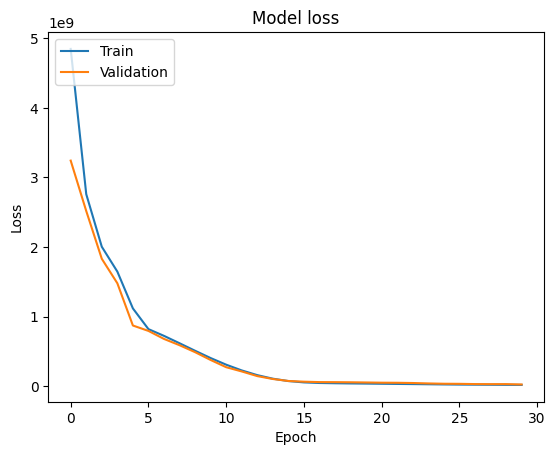

In [53]:
# Plot training & validation loss values
plt.plot(history_MLSTMFCN.history['loss'])
plt.plot(history_MLSTMFCN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
yhat_MLSTMFCN = model_MLSTMFCN.predict(x_test_multi, verbose=0)

In [55]:
print(yhat_MLSTMFCN.shape)

(15221, 8, 10)


In [56]:
yhat_MLSTMFCN = yhat_MLSTMFCN[:,0,:]

In [57]:
# Reshape back to (-1, 10, 1)
x_test_multi = x_test_multi.reshape(15221, 10, 8)
y_test = y_test.reshape(15221, 10, 1)
yhat_MLSTMFCN = yhat_MLSTMFCN.reshape(15221, 10, 1)

In [58]:
# save predictions
np.save("predicted_data_error/pred_MLSTMFCN", yhat_MLSTMFCN)

MLSTM-FCN - RAIN

In [61]:
# reshape training and test data
x_train_multi_r = x_train_multi_r.reshape(-1, 8, 10)
y_train_r = y_train_r.reshape(-1, 1, 10)

x_test_multi_r = x_test_multi_r.reshape(-1, 8, 10)
y_test_r = y_test_r.reshape(-1, 1, 10)

In [62]:
ip = Input(shape=(x_train_multi_r.shape[1], 10))

x = Masking()(ip)
x = LSTM(128, activation="relu", return_sequences=True)(x)
x = Dropout(0.2)(x)

y = Permute((2, 1))(ip)
y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
y = squeeze_excite_block(y)

y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
y = squeeze_excite_block(y)

y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform', groups=1)(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)

y = GlobalAveragePooling1D()(y)
y = RepeatVector(x.shape[1])(y)  # Repeat y to match the time dimension of x

x = concatenate([x, y])

out = Dense(10, activation='linear')(x)


model_MLSTMFCN_r = Model(ip, out)

In [63]:
model_MLSTMFCN_r.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 8, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_6 (Permute) │ (None, 10, 8)     │          0 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 10, 128)   │      8,320 │ permute_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 128)   │        512 │ conv1d_18[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 10, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_18[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_11          │ (None, 1, 128)    │          0 │ global_average_p… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1, 8)      │      1,024 │ reshape_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1, 128)    │      1,024 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_10         │ (None, 10, 128)   │          0 │ activation_18[0]… │
│ (Multiply)          │                   │            │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 10, 256)   │    164,096 │ multiply_10[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 256)   │      1,024 │ conv1d_19[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 10, 256)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ activation_19[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_12          │ (None, 1, 256)    │          0 │ global_average_p… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 1, 16)     │      4,096 │ reshape_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1, 256)    │      4,096 │ dense_28[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_11         │ (None, 10, 256)   │          0 │ activation_19[0]… │
│ (Multiply)          │                   │            │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 10, 128)   │     98,432 │ multiply_11[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 356,874 (1.36 MB)

 Trainable params: 355,850 (1.36 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [64]:
optimizer = Adam(learning_rate=0.001)
model_MLSTMFCN_r.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse','mae','mape'])

In [65]:
history_MLSTMFCN_r = model_MLSTMFCN_r.fit(x_train_multi_r, y_train_r, epochs=35, batch_size=8, validation_split=0.2)

Epoch 1/35
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - loss: 6830628352.0000 - mae: 78402.1484 - mape: 87.6338 - mse: 6830628352.0000 - val_loss: 3640825344.0000 - val_mae: 44731.6328 - val_mape: 48.7306 - val_mse: 3640825344.0000
Epoch 2/35
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 3187082496.0000 - mae: 41379.2734 - mape: 45.8062 - mse: 3187082496.0000 - val_loss: 2734444800.0000 - val_mae: 35073.4766 - val_mape: 38.1950 - val_mse: 2734444800.0000
Epoch 3/35
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 2488239872.0000 - mae: 34076.4531 - mape: 37.8279 - mse: 2488239872.0000 - val_loss: 1994698624.0000 - val_mae: 26587.4043 - val_mape: 28.7982 - val_mse: 1994698624.0000
Epoch 4/35
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 1916691584.0000 - mae: 27099.5195 - mape: 29.9106 - mse: 1916691584.0000 - val_loss: 1887913472.0000 - val_mae: 25327.3008 - val_mape: 27.4374 - val_mse: 1887913472.0000
Epoch 5/35
1013/1013 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 

In [66]:
test_loss_MLSTMFCN_r, test_mse_MLSTMFCN_r, test_mae_MLSTMFCN_r, test_mape_MLSTMFCN_r = model_MLSTMFCN_r.evaluate(x_test_multi_r, y_test_r)

print("Test Loss:", test_loss_MLSTMFCN_r)
print("Test MSE:", test_loss_MLSTMFCN_r)
print("Test MAE:", test_mae_MLSTMFCN_r)
print("Test MAPE:", test_mape_MLSTMFCN_r)

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 52653400.0000 - mae: 4241.3291 - mape: 4.3579 - mse: 52653400.0000
Test Loss: 49462932.0
Test MSE: 49462932.0
Test MAE: 3745.9462890625
Test MAPE: 4.0465989112854


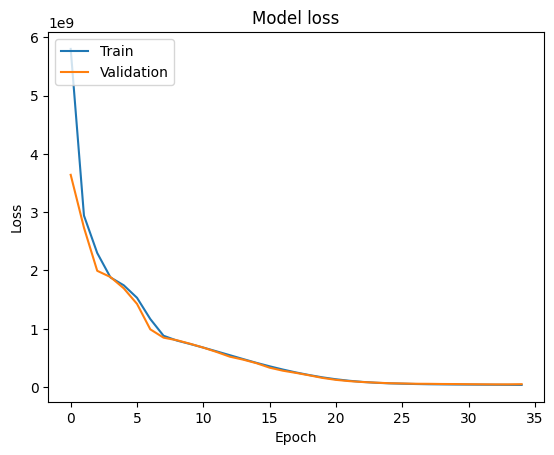

In [67]:
# Plot training & validation loss values
plt.plot(history_MLSTMFCN_r.history['loss'])
plt.plot(history_MLSTMFCN_r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [68]:
yhat_MLSTMFCN_r = model_MLSTMFCN_r.predict(x_test_multi_r, verbose=0)

In [69]:
print(yhat_MLSTMFCN_r.shape)

(2531, 8, 10)


In [70]:
yhat_MLSTMFCN_r = yhat_MLSTMFCN_r[:,0,:]

In [71]:
# Reshape back to (-1, 10, 1)
x_test_multi_r = x_test_multi_r.reshape(2531, 10, 8)
y_test_r = y_test_r.reshape(2531, 10, 1)
yhat_MLSTMFCN_r = yhat_MLSTMFCN_r.reshape(2531, 10, 1)

In [72]:
# save predictions
np.save("predicted_data_error/pred_MLSTMFCN_r", yhat_MLSTMFCN_r)

# Calculate metrics

LSTM-FCN - NO rain

In [48]:
pred_LSTMFCN = np.load("predicted_data_error/pred_LSTMFCN.npy")
pred_LSTMFCN = pred_LSTMFCN.reshape(-1,10)
y_test = y_test.reshape(-1, 10)

# MSE
LSTMFCN_rmse = mean_squared_error(y_test, pred_LSTMFCN)
print(LSTMFCN_rmse)

#MAE
LSTMFCN_mae = mean_absolute_error(y_test, pred_LSTMFCN)
print(LSTMFCN_mae)

#MAPE
LSTMFCN_mape = mean_absolute_percentage_error(y_test, pred_LSTMFCN)
print(LSTMFCN_mape)

55024178.38720155
3479.547169053035
0.034243608494240865


LSTM-FCN Rain

In [49]:
pred_LSTMFCN_r = np.load("predicted_data_error/pred_LSTMFCN_r.npy")
pred_LSTMFCN_r = pred_LSTMFCN_r.reshape(-1,10)
y_test_r = y_test_r.reshape(-1, 10)

# MSE
LSTMFCN_r_rmse = mean_squared_error(y_test_r, pred_LSTMFCN_r)
print(LSTMFCN_r_rmse)

#MAE
LSTMFCN_r_mae = mean_absolute_error(y_test_r, pred_LSTMFCN_r)
print(LSTMFCN_r_mae)

#MAPE
LSTMFCN_r_mape = mean_absolute_percentage_error(y_test_r, pred_LSTMFCN_r)
print(LSTMFCN_r_mape)

78678865.86183086
5657.992063104999
0.06171400645267848


MLSTM-FCN - NO rain

In [50]:
pred_MLSTMFCN = np.load("predicted_data_error/pred_MLSTMFCN.npy")
pred_MLSTMFCN = pred_MLSTMFCN.reshape(-1,10)
y_test = y_test.reshape(-1, 10)

# MSE
MLSTMFCN_rmse = mean_squared_error(y_test, pred_MLSTMFCN)
print(MLSTMFCN_rmse)

#MAE
MLSTMFCN_mae = mean_absolute_error(y_test, pred_MLSTMFCN)
print(MLSTMFCN_mae)

#MAPE
MLSTMFCN_mape = mean_absolute_percentage_error(y_test, pred_MLSTMFCN)
print(MLSTMFCN_mape)

26537436.231389984
2575.9354720144042
0.026280995352976295


MLSTM-FCN - Rain

In [51]:
pred_MLSTMFCN_r = np.load("predicted_data_error/pred_MLSTMFCN_r.npy")
pred_MLSTMFCN_r = pred_MLSTMFCN_r.reshape(-1,10)
y_test_r = y_test_r.reshape(-1, 10)

# MSE
MLSTMFCN_r_rmse = mean_squared_error(y_test_r, pred_MLSTMFCN_r)
print(MLSTMFCN_r_rmse)

#MAE
MLSTMFCN_r_mae = mean_absolute_error(y_test_r, pred_MLSTMFCN_r)
print(MLSTMFCN_r_mae)

#MAPE
MLSTMFCN_r_mape = mean_absolute_percentage_error(y_test_r, pred_MLSTMFCN_r)
print(MLSTMFCN_r_mape)

56659053.828027785
4000.5961440636115
0.04299293660591214


# Graphs

No rain

In [52]:
y_test = y_test.reshape(-1, 10)
print(y_test.shape)
print(pred_LSTMFCN.shape)
print(pred_MLSTMFCN.shape)

(15221, 10)
(15221, 10)
(15221, 10)


In [30]:
actual_seq = []
ulstm_seq = []
mlstm_seq = []

for i in y_test[5:50]:
    actual_seq.append(i[0])

for i in pred_LSTMFCN[5:50]:
    ulstm_seq.append(i[0])

for i in pred_MLSTMFCN[5:50]:
    mlstm_seq.append(i[0])

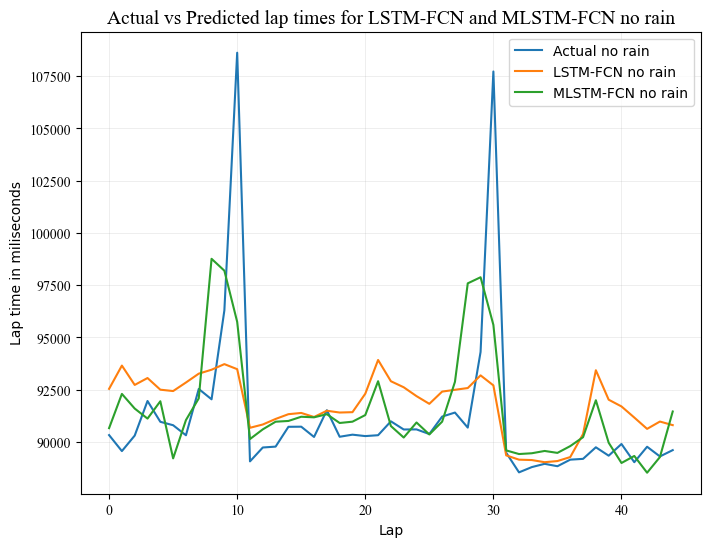

In [31]:
plt.figure(figsize=(8, 6))

# Plotting the actual data
plt.plot(actual_seq, label='Actual no rain')

# Plotting the predictions from model 1
plt.plot(ulstm_seq, label='LSTM-FCN no rain')

# Plotting the predictions from model 2
plt.plot(mlstm_seq, label='MLSTM-FCN no rain')

plt.xlabel('Lap')
plt.ylabel('Lap time in miliseconds')
plt.title('Actual vs Predicted lap times for LSTM-FCN and MLSTM-FCN no rain', fontname='Times New Roman', fontsize=14)
plt.legend(prop={'family': 'Times New Roman', 'size': 10})  # Setting font for legend
plt.grid(True, alpha=0.3, linewidth=0.5)  # Adjusting grid lines
plt.legend()
plt.grid(True)

# Set font for tick labels
plt.xticks(fontname='Times New Roman', fontsize=10)
plt.yticks(fontname='Times New Roman', fontsize=10)

plt.savefig('graphs/graphnorain.png')

plt.show()

In [53]:
print(y_test.shape)
print(pred_LSTMFCN.shape)
print(pred_MLSTMFCN.shape)

(15221, 10)
(15221, 10)
(15221, 10)


In [60]:
# seq 1
actual_seq_1 = []
ulstm_seq_1 = []
mlstm_seq_1 = []

for i in y_test[527:557]:
    actual_seq_1.append(i[0])

for i in pred_LSTMFCN[527:557]:
    ulstm_seq_1.append(i[0])

for i in pred_MLSTMFCN[527:557]:
    mlstm_seq_1.append(i[0])

In [64]:
# seq 2
actual_seq_2 = []
ulstm_seq_2 = []
mlstm_seq_2 = []

for i in y_test[768:799]:
    actual_seq_2.append(i[0])

for i in pred_LSTMFCN[768:799]:
    ulstm_seq_2.append(i[0])

for i in pred_MLSTMFCN[768:799]:
    mlstm_seq_2.append(i[0])

In [69]:
# seq 3
actual_seq_3 = []
ulstm_seq_3 = []
mlstm_seq_3 = []

for i in y_test[983:1033]:
    actual_seq_3.append(i[0])

for i in pred_LSTMFCN[983:1033]:
    ulstm_seq_3.append(i[0])

for i in pred_MLSTMFCN[983:1033]:
    mlstm_seq_3.append(i[0])

In [76]:
# seq 4
actual_seq_4 = []
ulstm_seq_4 = []
mlstm_seq_4 = []

for i in y_test[1233:1283]:
    actual_seq_4.append(i[0])

for i in pred_LSTMFCN[1233:1283]:
    ulstm_seq_4.append(i[0])

for i in pred_MLSTMFCN[1233:1283]:
    mlstm_seq_4.append(i[0])

C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2480870819.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2480870819.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2480870819.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2480870819.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabe

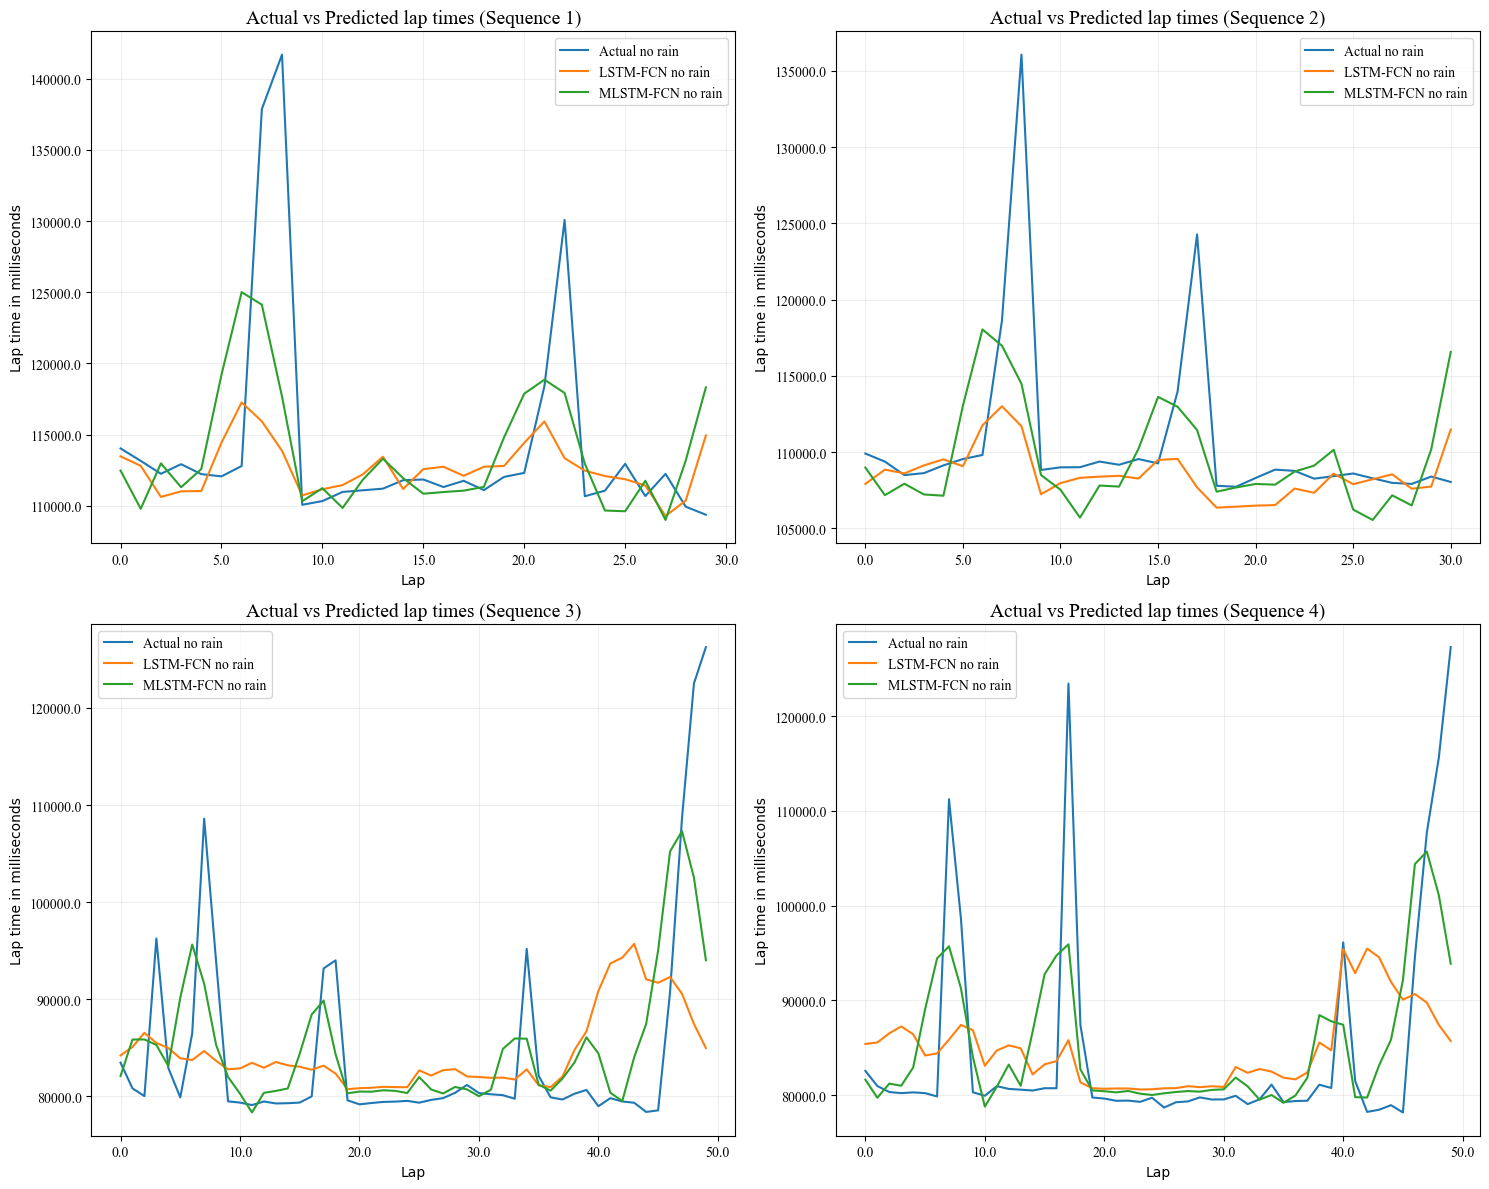

In [77]:
# Grouping sequences into lists
actual_seq_list = [actual_seq_1, actual_seq_2, actual_seq_3, actual_seq_4]
ulstm_seq_list = [ulstm_seq_1, ulstm_seq_2, ulstm_seq_3, ulstm_seq_4]
mlstm_seq_list = [mlstm_seq_1, mlstm_seq_2, mlstm_seq_3, mlstm_seq_4]

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid of subplots

# Plot each sequence in a subplot
for i in range(4):
    ax = axs[i//2, i%2]  # Get the correct subplot
    ax.plot(actual_seq_list[i], label='Actual no rain')
    ax.plot(ulstm_seq_list[i], label='LSTM-FCN no rain')
    ax.plot(mlstm_seq_list[i], label='MLSTM-FCN no rain')
    
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap time in milliseconds')
    ax.set_title(f'Actual vs Predicted lap times (Sequence {i+1})', fontname='Times New Roman', fontsize=14)
    ax.legend(prop={'family': 'Times New Roman', 'size': 10})
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    # Set font for tick labels
    ax.tick_params(axis='both', which='major', labelsize=10, labelrotation=0)
    ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
    ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')

# Adjust layout to prevent overlap
plt.tight_layout()

# # Save the figure
plt.savefig('graphs/graph_norain.png')

# Show the figure
plt.show()

Rain

In [35]:
y_test_r = y_test_r.reshape(-1, 10)
print(y_test_r.shape)
print(pred_LSTMFCN_r.shape)
print(pred_MLSTMFCN_r.shape)

(2531, 10)
(2531, 10)
(2531, 10)


In [36]:
actual_seq_r = []
ulstm_seq_r = []
mlstm_seq_r  = []

for i in y_test[0:33]:
    actual_seq_r.append(i[0])

for i in pred_LSTMFCN[0:33]:
    ulstm_seq_r.append(i[0])

for i in pred_MLSTMFCN[0:33]:
    mlstm_seq_r.append(i[0])

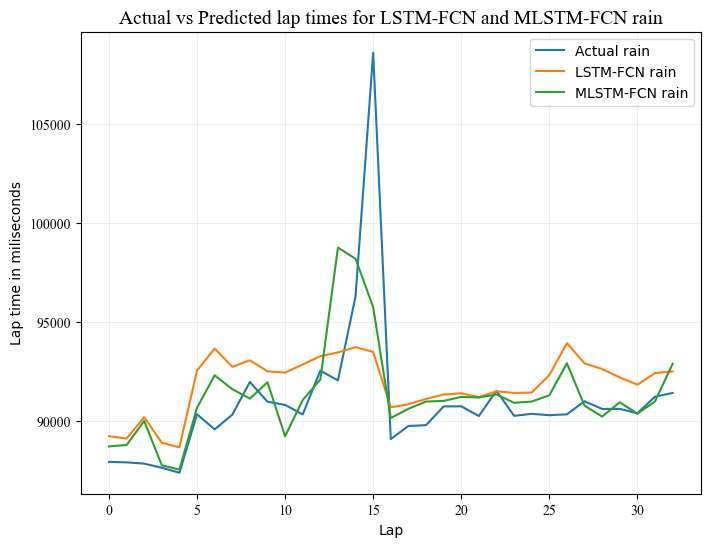

In [37]:
plt.figure(figsize=(8, 6))

# Plotting the actual data
plt.plot(actual_seq_r, label='Actual rain')

# Plotting the predictions from model 1
plt.plot(ulstm_seq_r, label='LSTM-FCN rain')

# Plotting the predictions from model 2
plt.plot(mlstm_seq_r, label='MLSTM-FCN rain')

plt.xlabel('Lap')
plt.ylabel('Lap time in miliseconds')
plt.title('Actual vs Predicted lap times for LSTM-FCN and MLSTM-FCN rain', fontname='Times New Roman', fontsize=14)
plt.legend(prop={'family': 'Times New Roman', 'size': 10})  # Setting font for legend
plt.grid(True, alpha=0.3, linewidth=0.5)  # Adjusting grid lines
plt.legend()
plt.grid(True)

# Set font for tick labels
plt.xticks(fontname='Times New Roman', fontsize=10)
plt.yticks(fontname='Times New Roman', fontsize=10)

plt.savefig('graphs/graphrain.png')

plt.show()

In [78]:
print(y_test_r.shape)
print(pred_LSTMFCN_r.shape)
print(pred_MLSTMFCN_r.shape)

(2531, 10)
(2531, 10)
(2531, 10)


In [86]:
# seq 1
actual_seq_1 = []
ulstm_seq_1 = []
mlstm_seq_1 = []

for i in y_test_r[520:572]:
    actual_seq_1.append(i[0])

for i in pred_LSTMFCN_r[520:572]:
    ulstm_seq_1.append(i[0])

for i in pred_MLSTMFCN_r[520:572]:
    mlstm_seq_1.append(i[0])

In [92]:
# seq 2
actual_seq_2 = []
ulstm_seq_2 = []
mlstm_seq_2 = []

for i in y_test_r[1009:1061]:
    actual_seq_2.append(i[0])

for i in pred_LSTMFCN_r[1009:1061]:
    ulstm_seq_2.append(i[0])

for i in pred_MLSTMFCN_r[1009:1061]:
    mlstm_seq_2.append(i[0])

In [99]:
# seq 3
actual_seq_3 = []
ulstm_seq_3 = []
mlstm_seq_3 = []

for i in y_test_r[1473:1531]:
    actual_seq_3.append(i[0])

for i in pred_LSTMFCN_r[1473:1531]:
    ulstm_seq_3.append(i[0])

for i in pred_MLSTMFCN_r[1473:1531]:
    mlstm_seq_3.append(i[0])

In [105]:
# seq 4
actual_seq_4 = []
ulstm_seq_4 = []
mlstm_seq_4 = []

for i in y_test_r[1983:2041]:
    actual_seq_4.append(i[0])

for i in pred_LSTMFCN_r[1983:2041]:
    ulstm_seq_4.append(i[0])

for i in pred_MLSTMFCN_r[1983:2041]:
    mlstm_seq_4.append(i[0])

C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2240993074.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2240993074.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2240993074.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
C:\Users\Fleur\AppData\Local\Temp\ipykernel_17488\2240993074.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabe

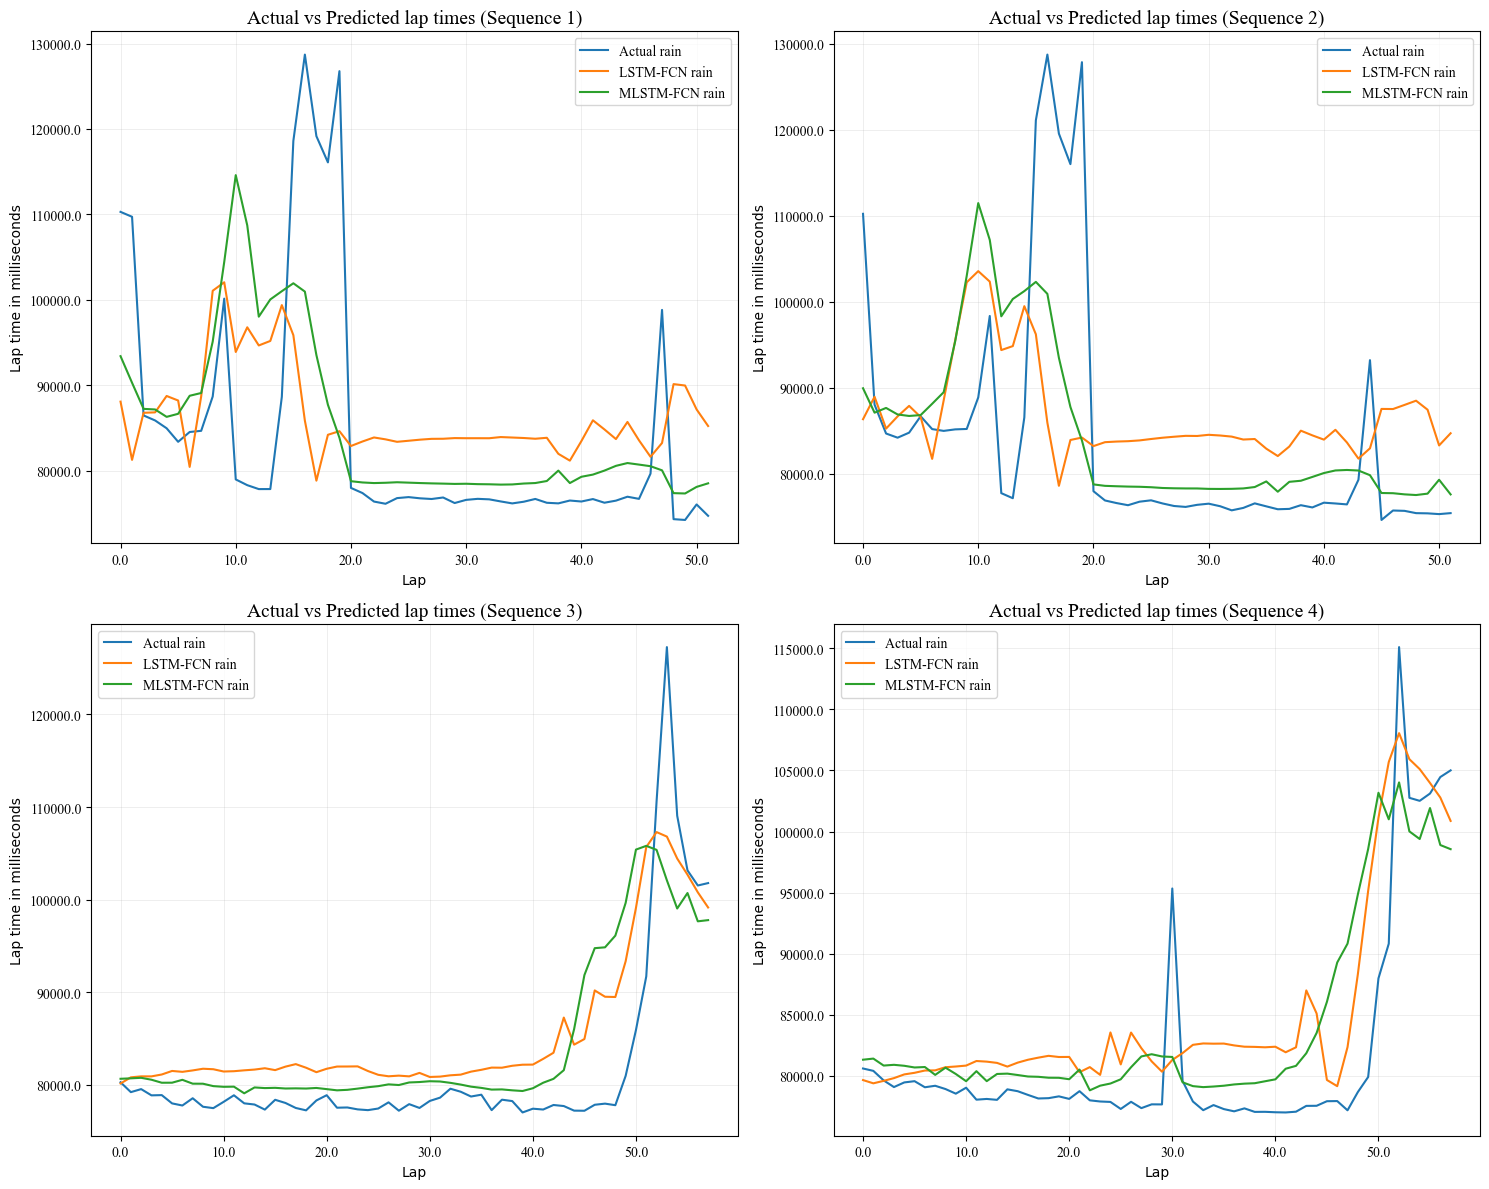

In [106]:
# Grouping sequences into lists
actual_seq_list = [actual_seq_1, actual_seq_2, actual_seq_3, actual_seq_4]
ulstm_seq_list = [ulstm_seq_1, ulstm_seq_2, ulstm_seq_3, ulstm_seq_4]
mlstm_seq_list = [mlstm_seq_1, mlstm_seq_2, mlstm_seq_3, mlstm_seq_4]

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid of subplots

# Plot each sequence in a subplot
for i in range(4):
    ax = axs[i//2, i%2]  # Get the correct subplot
    ax.plot(actual_seq_list[i], label='Actual rain')
    ax.plot(ulstm_seq_list[i], label='LSTM-FCN rain')
    ax.plot(mlstm_seq_list[i], label='MLSTM-FCN rain')
    
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap time in milliseconds')
    ax.set_title(f'Actual vs Predicted lap times (Sequence {i+1})', fontname='Times New Roman', fontsize=14)
    ax.legend(prop={'family': 'Times New Roman', 'size': 10})
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    # Set font for tick labels
    ax.tick_params(axis='both', which='major', labelsize=10, labelrotation=0)
    ax.set_xticklabels(ax.get_xticks(), fontname='Times New Roman')
    ax.set_yticklabels(ax.get_yticks(), fontname='Times New Roman')

# Adjust layout to prevent overlap
plt.tight_layout()

# # Save the figure
plt.savefig('graphs/graph_rain.png')

# Show the figure
plt.show()